# Seasonality in Pb from a variety of datasets

In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import datetime
import calendar

%matplotlib inline

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# AGRO dataset: Arctic Rivers

<img src="files/watershedmap.jpg">

http://www.arcticgreatrivers.org/images/watershedmap.jpg

In [3]:
# Load data:
def read_AGRO(filename):
    ifile = open(filename,'rt', encoding='UTF8')
    data = csv.reader(ifile)
    
    station = []
    date = []
    Pb = []
    Fe = []
   
    i = 0
    for row in data:
        i += 1
        if i < 2:
            i == 1
        else:
            station.append(str(row[0]))
            date.append(str(row[1]))
            Pb.append(float(row[3]))
            Fe.append(float(row[4]))
    return station, date, Pb, Fe

f1 = '/ocean/brogalla/GEOTRACES/data/rivers/AGRO_river_tracers.csv'

stat, dates, Pb, Fe = read_AGRO(f1)

In [4]:
# Load data:
def read_AGROQ(filename):
    ifile = open(filename,'rt', encoding='UTF8')
    data = csv.reader(ifile)
    
    date = []
    yukon = []
    mackenzie = []
    lena = []
    ob = []
    yenisey = []
    kolyma = []

    i = 0
    for row in data:
        i += 1
        if i <= 3:
            i == 2
        else:
            date.append(str(row[0]))
            yukon.append(float(row[1].replace(',','')))
            mackenzie.append(float(row[2].replace(',','')))
            lena.append(float(row[3].replace(',','')))
            ob.append(float(row[4].replace(',','')))
#            yenisey.append(float(row[5].replace(',','')))
            kolyma.append(float(row[6].replace(',','')))
    return date, yukon, mackenzie, lena, ob, yenisey, kolyma

f1 = '/ocean/brogalla/GEOTRACES/data/rivers/AGRO_river_discharge.csv'

date_Q, yukon, mackenzie, lena, ob, yenisey, kolyma = read_AGROQ(f1)

In [5]:
def convert_date(date):
    date_obj = []
    j = 0
    for i in date:
        j+=1
        conv = datetime.datetime.strptime(i, '%Y-%m-%d')
        date_obj.append(conv)
        
    return date_obj

In [6]:
dates_Q = convert_date(date_Q[::-1])
yukon = yukon[::-1]
mackenzie = mackenzie[::-1]
lena = lena[::-1]
ob = ob[::-1]
yenisey = yenisey[::-1]
kolyma = kolyma[::-1]

In [7]:
def convert_date_AGRO(date):
    date_obj = []
    j = 0
    for i in date:
        j+=1
        conv = datetime.datetime.strptime(i, '%d-%b-%y')
        date_obj.append(conv)
        
    return date_obj

In [56]:
dates_kolyma = dates[0:8]
dates_kolyma = convert_date_AGRO(dates_kolyma)
Pb_kolyma = Pb[0:8]
dates_lena = dates[8:23]
dates_lena = convert_date_AGRO(dates_lena)
Pb_lena = Pb[8:23]
dates_mack = dates[23:37]
dates_mack = convert_date_AGRO(dates_mack)
Pb_mack = Pb[23:37]
dates_ob_ini = dates[37:52]
Pb_ob_ini = Pb[37:52]
dates_yenisey = dates[52:65]
dates_yenisey = convert_date_AGRO(dates_yenisey)
Pb_yenisey = Pb[52:65]
dates_yukon = dates[65:80]
dates_yukon = convert_date_AGRO(dates_yukon)
Pb_yukon = Pb[65:80]

In [57]:
Pb_ob = []
dates_ob = []

for i in range(0,len(Pb_ob_ini)):
    if np.isnan(Pb_ob_ini[i]):
        a = 1
    else:
        Pb_ob.append(Pb_ob_ini[i])
        dates_ob.append(dates_ob_ini[i])

In [58]:
dates_ob = convert_date_AGRO(dates_ob)

In [59]:
def toTimestamp(d):
    return calendar.timegm(d.timetuple())

Q_dates = np.array([dates_Q[0] + datetime.timedelta(weeks=i) for i in range(52*3)])

In [60]:
def interp_date(date_obj, value):
    arr1 = np.array([toTimestamp(date_obj[i]) for i in range(0,len(date_obj))]) 
    arr2 = value
    
    interp_dates = np.array([dates_Q[0] + datetime.timedelta(weeks=i) for i in range(52*3)])
    results = []
    
    for i in range(0,len(interp_dates)):
        result = np.interp(toTimestamp(interp_dates[i]),arr1,arr2)
        results.append(result)
        
    return results

In [61]:
Q_yukon = interp_date(dates_Q, yukon)
Q_mackenzie = interp_date(dates_Q, mackenzie)
Q_lena = interp_date(dates_Q, lena)
Q_ob = interp_date(dates_Q, ob)
Q_kolyma = interp_date(dates_Q, kolyma)

In [62]:
QPb_yukon = interp_date(dates_yukon, Pb_yukon)
QPb_mackenzie = interp_date(dates_mack, Pb_mack)
QPb_lena = interp_date(dates_lena, Pb_lena)
QPb_ob = interp_date(dates_ob, Pb_ob)
QPb_kolyma = interp_date(dates_kolyma, Pb_kolyma)

In [63]:
def normalize(value):
    norm_value = [(i-np.min(value))/(np.max(value)-np.min(value)) for i in value]
    return norm_value

(731580.0, 732266.0)

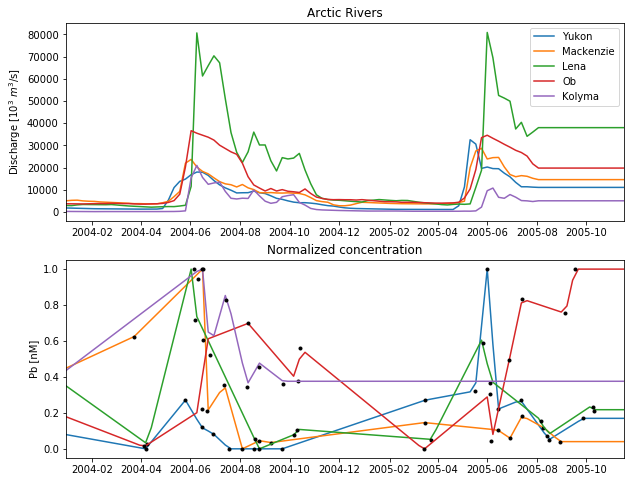

In [64]:
fig = plt.figure(figsize=(10,8))
ax1 = plt.subplot2grid((2, 1), (0, 0)) # discharge
ax2 = plt.subplot2grid((2, 1), (1, 0))

ax1.plot(Q_dates,Q_yukon,label='Yukon')
ax1.plot(Q_dates, Q_mackenzie, label='Mackenzie')
ax1.plot(Q_dates, Q_lena, label='Lena')
ax1.plot(Q_dates, Q_ob, label='Ob')
ax1.plot(Q_dates, Q_kolyma, label='Kolyma')
ax1.set_ylabel(r'Discharge [$10^3$ $m^3$/s]')
ax1.set_title('Arctic Rivers')
ax1.set_xlim(Q_dates[52], Q_dates[150])
ax1.legend()

ax2.plot(Q_dates, normalize(QPb_yukon),label='Yukon')
ax2.plot(dates_yukon, normalize(Pb_yukon),'.k' )
ax2.plot(Q_dates, normalize(QPb_mackenzie), label='Mackenzie')
ax2.plot(dates_mack, normalize(Pb_mack), '.k' )
ax2.plot(Q_dates, normalize(QPb_lena), label='Lena')
ax2.plot(dates_lena, normalize(Pb_lena), '.k' )
ax2.plot(Q_dates, normalize(QPb_ob), label='Ob')
ax2.plot(dates_ob, normalize(Pb_ob), '.k' )
ax2.plot(Q_dates, normalize(QPb_kolyma), label='Kolyma')
ax2.plot(dates_kolyma, normalize(Pb_kolyma), '.k' )
ax2.set_ylabel(r'Pb [nM]')
ax2.set_title('Normalized concentration')
ax2.set_xlim(Q_dates[52], Q_dates[150])

##### Date of ice break up:

Yukon: http://www.yukonriverbreakup.com/statistics

Mackenzie: Muhammad, P., C. Duguay, and K. K. Kang. "Monitoring ice break-up on the Mackenzie River using MODIS data." The Cryosphere 10.2 (2016): 569.

Lena: http://onlinelibrary.wiley.com/doi/10.1002/hyp.1146/epdf (estimate based on 1987) also: https://ac.els-cdn.com/S0921818105000615/1-s2.0-S0921818105000615-main.pdf?_tid=0c892d10-06bf-11e8-a456-00000aacb360&acdnat=1517428014_67f688b93e3869dcc42130b49f60a01d

Ob: http://www.tandfonline.com/doi/pdf/10.1080/02723646.2000.10642698?needAccess=true (from 1990s)

Kolyma: Mann, P. J., et al. "Controls on the composition and lability of dissolved organic matter in Siberia's Kolyma River basin." Journal of Geophysical Research: Biogeosciences 117.G1 (2012). http://onlinelibrary.wiley.com/doi/10.1029/2011JG001798/epdf (average for 1999-2010)

In [65]:
ice_yukon = [datetime.datetime.strptime('2004-05-04', '%Y-%m-%d'),\
            datetime.datetime.strptime('2005-04-29','%Y-%m-%d')]
ice_mack = [datetime.datetime.strptime('2004-05-01', '%Y-%m-%d'),\
            datetime.datetime.strptime('2005-04-26','%Y-%m-%d')]
ice_lena = [datetime.datetime.strptime('2004-05-15', '%Y-%m-%d'),\
            datetime.datetime.strptime('2005-05-15','%Y-%m-%d')]
ice_ob = [datetime.datetime.strptime('2004-04-30', '%Y-%m-%d'),\
            datetime.datetime.strptime('2005-04-30','%Y-%m-%d')]
ice_kolyma = [datetime.datetime.strptime('2004-05-21', '%Y-%m-%d'),\
            datetime.datetime.strptime('2005-05-21','%Y-%m-%d')]

(-0.05, 1.05)

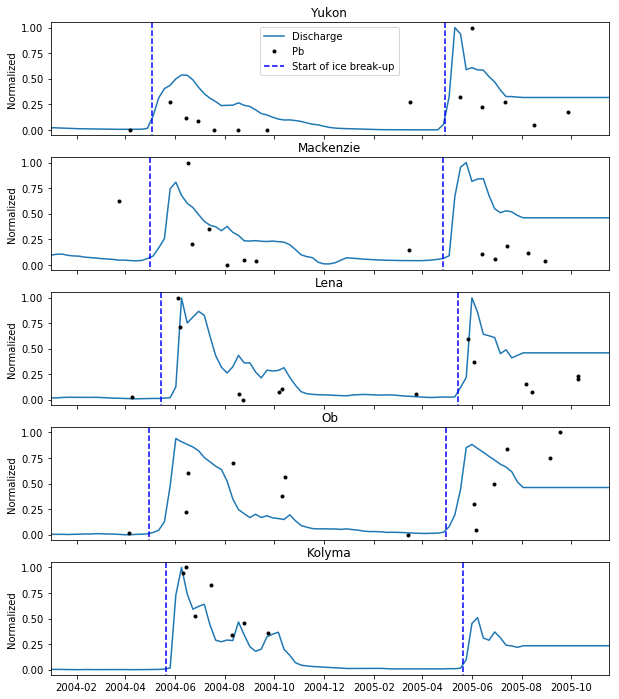

In [66]:
fig = plt.figure(figsize=(10,12))
ax1 = plt.subplot2grid((5, 1), (0, 0)) # discharge
ax2 = plt.subplot2grid((5, 1), (1, 0))
ax3 = plt.subplot2grid((5, 1), (2, 0))
ax4 = plt.subplot2grid((5, 1), (3, 0))
ax5 = plt.subplot2grid((5, 1), (4, 0))

ax1.plot(Q_dates, normalize(Q_yukon), label='Discharge')
#ax1.plot(Q_dates, normalize(QPb_yukon), label='Pb')
ax1.plot(dates_yukon, normalize(Pb_yukon), '.k', label = 'Pb')
ax1.plot([ice_yukon[0],ice_yukon[0]],[-0.1, 1.1],'--b', label= 'Start of ice break-up')
ax1.plot([ice_yukon[1],ice_yukon[1]],[-0.1, 1.1],'--b')
ax1.set_ylabel('Normalized')
ax1.set_title('Yukon')
ax1.set_xlim(Q_dates[52], Q_dates[150])
ax1.set_xticklabels([])
ax1.set_ylim(-0.05,1.05)
ax1.legend()

ax2.plot(Q_dates, normalize(Q_mackenzie), label='Discharge')
#ax2.plot(Q_dates, normalize(QPb_mackenzie), label='Pb')
ax2.plot([ice_mack[0],ice_mack[0]],[-0.1, 1.1],'--b', label= 'Start of ice break-up')
ax2.plot([ice_mack[1],ice_mack[1]],[-0.1, 1.1],'--b')
ax2.plot(dates_mack, normalize(Pb_mack),'.k')
ax2.set_ylabel('Normalized')
ax2.set_title('Mackenzie')
ax2.set_xlim(Q_dates[52], Q_dates[150])
ax2.set_ylim(-0.05,1.05)
ax2.set_xticklabels([])

ax3.plot(Q_dates, normalize(Q_lena), label='Discharge')
# ax3.plot(Q_dates, normalize(QPb_lena), label='Pb')
ax3.plot(dates_lena, normalize(Pb_lena),'.k')
ax3.plot([ice_lena[0],ice_lena[0]],[-0.1, 1.1],'--b', label= 'Start of ice break-up')
ax3.plot([ice_lena[1],ice_lena[1]],[-0.1, 1.1],'--b')
ax3.set_ylabel('Normalized')
ax3.set_title('Lena')
ax3.set_xlim(Q_dates[52], Q_dates[150])
ax3.set_ylim(-0.05,1.05)
ax3.set_xticklabels([])

ax4.plot(Q_dates, normalize(Q_ob), label='Discharge')
# ax4.plot(Q_dates, normalize(QPb_ob), label='Pb')
ax4.plot(dates_ob, normalize(Pb_ob),'.k')
ax4.plot([ice_ob[0],ice_ob[0]],[-0.1, 1.1],'--b', label= 'Start of ice break-up')
ax4.plot([ice_ob[1],ice_ob[1]],[-0.1, 1.1],'--b')
ax4.set_ylabel('Normalized')
ax4.set_title('Ob')
ax4.set_xlim(Q_dates[52], Q_dates[150])
ax4.set_ylim(-0.05,1.05)
ax4.set_xticklabels([])

ax5.plot(Q_dates, normalize(Q_kolyma), label='Discharge')
# ax5.plot(Q_dates, normalize(QPb_kolyma), label='Pb')
ax5.plot(dates_kolyma, normalize(Pb_kolyma),'.k')
ax5.plot([ice_kolyma[0],ice_kolyma[0]],[-0.1, 1.1],'--b', label= 'Start of ice break-up')
ax5.plot([ice_kolyma[1],ice_kolyma[1]],[-0.1, 1.1],'--b')
ax5.set_ylabel('Normalized')
ax5.set_title('Kolyma')
ax5.set_xlim(Q_dates[52], Q_dates[150])
ax5.set_ylim(-0.05,1.05)

# fig.savefig('AGRO_rivers.png',bbox_inches='tight')

In [67]:
ax1.plot(Q_dates, normalize(Q_yukon), label='Discharge')
ax1.plot(dates_yukon, normalize(Pb_yukon), '.k', label = 'Pb')
ax1.plot([ice_yukon[0],ice_yukon[0]],[-0.1, 1.1],'--b', label= 'Start of ice break-up')
ax1.plot([ice_yukon[1],ice_yukon[1]],[-0.1, 1.1],'--b')

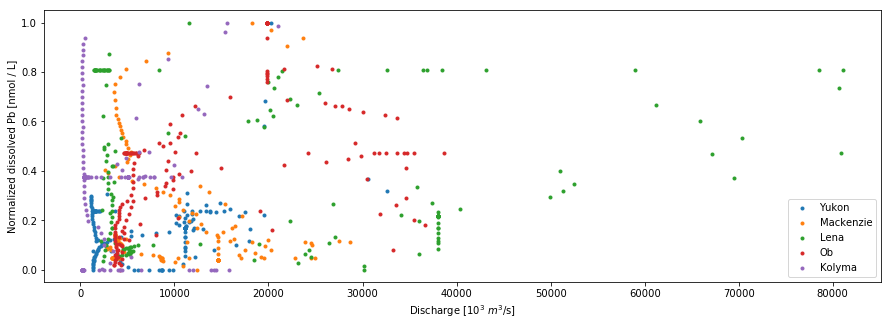

In [68]:
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1, 1), (0, 0)) 

ax1.plot(Q_yukon, normalize(QPb_yukon), '.', label= 'Yukon')
ax1.plot(Q_mackenzie, normalize(QPb_mackenzie), '.', label= 'Mackenzie')
ax1.plot(Q_lena, normalize(QPb_lena), '.', label= 'Lena')
ax1.plot(Q_ob, normalize(QPb_ob), '.', label= 'Ob')
ax1.plot(Q_kolyma, normalize(QPb_kolyma), '.', label= 'Kolyma')
ax1.set_xlabel(r'Discharge [$10^3$ $m^3$/s]')
ax1.set_ylabel('Normalized dissolved Pb [nmol / L]')
ax1.legend()

Add time shift of three months to concentrations:

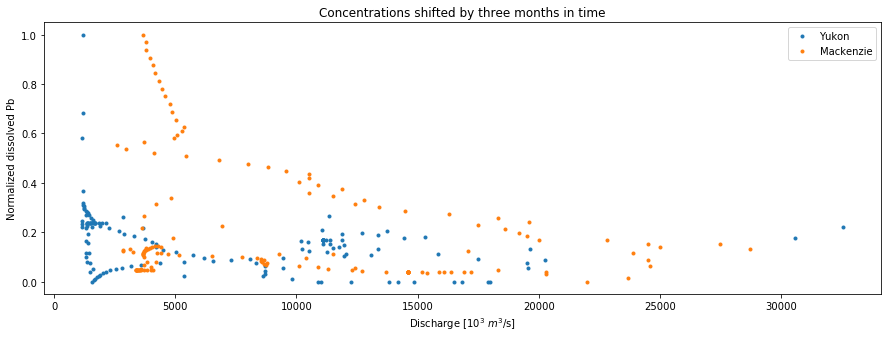

In [73]:
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1, 1), (0, 0)) 

shift = 10

ax1.plot(Q_yukon[0:156-shift], normalize(QPb_yukon[0+shift:156]), '.', label= 'Yukon')
ax1.plot(Q_mackenzie[0:156-shift], normalize(QPb_mackenzie[0+shift:156]), '.', label= 'Mackenzie')
# ax1.plot(Q_lena[0:156-shift], normalize(QPb_lena[0+shift:156]), '.', label= 'Lena')
# ax1.plot(Q_ob[0:156-shift], normalize(QPb_ob[0+shift:156]), '.', label= 'Ob')
# ax1.plot(Q_kolyma[0:156-shift], normalize(QPb_kolyma[0+shift:156]), '.', label= 'Kolyma')
ax1.set_xlabel(r'Discharge [$10^3$ $m^3$/s]')
ax1.set_ylabel('Normalized dissolved Pb')
ax1.set_title('Concentrations shifted by three months in time')
ax1.legend()

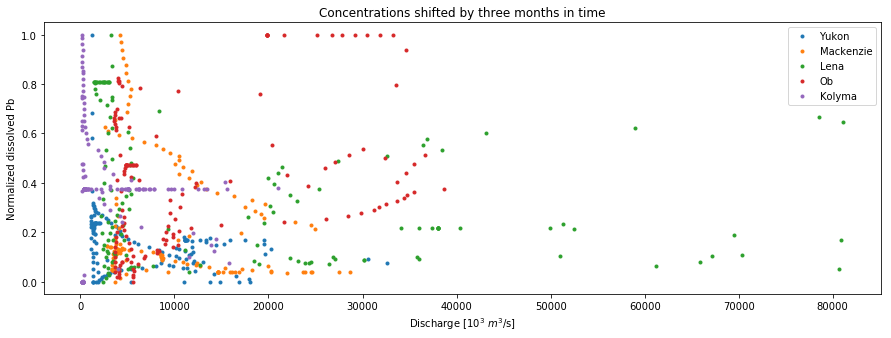

In [70]:
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1, 1), (0, 0)) 

shift = 15

ax1.plot(Q_yukon[0:156-shift], normalize(QPb_yukon[0+shift:156]), '.', label= 'Yukon')
ax1.plot(Q_mackenzie[0:156-shift], normalize(QPb_mackenzie[0+shift:156]), '.', label= 'Mackenzie')
ax1.plot(Q_lena[0:156-shift], normalize(QPb_lena[0+shift:156]), '.', label= 'Lena')
ax1.plot(Q_ob[0:156-shift], normalize(QPb_ob[0+shift:156]), '.', label= 'Ob')
ax1.plot(Q_kolyma[0:156-shift], normalize(QPb_kolyma[0+shift:156]), '.', label= 'Kolyma')
ax1.set_xlabel(r'Discharge [$10^3$ $m^3$/s]')
ax1.set_ylabel('Normalized dissolved Pb')
ax1.set_title('Concentrations shifted by three months in time')
ax1.legend()

Would like to compare time delay of concentration increase with peak discharge for rivers that don't freeze in the winter. I suspect the early dissolved concentration increase corresponds to the stage at which ice becomes permeable. Then, when the ice melts, particulate concentrations increase and particulate material is also picked up from erosion.